<a href="https://colab.research.google.com/github/GB-studyingcode/RFM-Analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd
url = 'https://drive.google.com/file/d/1B3TIiiN5ep7419IXK46rNZ3qZNA6GE23/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Data Processing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Xử lý Invoice Date

In [3]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'],format= '%m/%d/%Y %H:%M')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Customer null

In [5]:
df['CustomerID'].isnull().sum()

np.int64(135080)

In [6]:
df['CustomerID'].dropna(inplace=True)

In [7]:
df = df[df['CustomerID'].notnull()]

In [8]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

/tmp/ipython-input-1288432625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int).astype(str)


In [9]:
df = df[df['Quantity'] > 0]

In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#RFM Model

In [11]:
df_RFM = df.groupby('CustomerID',as_index = False).agg(
                              LastPurchaseDate = ('InvoiceDate','max'),
                              F = ('InvoiceNo', 'nunique'),
                              M = ('TotalPrice', 'sum'))

In [12]:
df_RFM['Today'] = pd.to_datetime('2025-10-11')
df_RFM

,CustomerID,LastPurchaseDate,F,M,Today
0,12346,2011-01-18 10:01:00,1,77183.60,2025-10-11
1,12347,2011-12-07 15:52:00,7,4310.00,2025-10-11
2,12348,2011-09-25 13:13:00,4,1797.24,2025-10-11
3,12349,2011-11-21 09:51:00,1,1757.55,2025-10-11
4,12350,2011-02-02 16:01:00,1,334.40,2025-10-11
...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,2025-10-11
4335,18281,2011-06-12 10:53:00,1,80.82,2025-10-11
4336,18282,2011-12-02 11:43:00,2,178.05,2025-10-11
4337,18283,2011-12-06 12:02:00,16,2094.88,2025-10-11


In [13]:
df_RFM['R'] = (df_RFM['Today'] - df_RFM['LastPurchaseDate']).dt.days
df_RFM

,CustomerID,LastPurchaseDate,F,M,Today,R
0,12346,2011-01-18 10:01:00,1,77183.60,2025-10-11,5379
1,12347,2011-12-07 15:52:00,7,4310.00,2025-10-11,5056
2,12348,2011-09-25 13:13:00,4,1797.24,2025-10-11,5129
3,12349,2011-11-21 09:51:00,1,1757.55,2025-10-11,5072
4,12350,2011-02-02 16:01:00,1,334.40,2025-10-11,5364
...,...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,2025-10-11,5331
4335,18281,2011-06-12 10:53:00,1,80.82,2025-10-11,5234
4336,18282,2011-12-02 11:43:00,2,178.05,2025-10-11,5061
4337,18283,2011-12-06 12:02:00,16,2094.88,2025-10-11,5057


In [14]:
df_RFM = df_RFM[['CustomerID', 'R', 'F', 'M']]

## Chia nhóm trên thang điểm 1 - 5

In [15]:
df_RFM['R_Score']= pd.qcut(df_RFM['R'], 5, labels=['5','4','3','2','1']).astype(str)

/tmp/ipython-input-3819073793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFM['R_Score']= pd.qcut(df_RFM['R'], 5, labels=['5','4','3','2','1']).astype(str)


In [16]:
# df_rfm['F_Score'] = pd.qcut (df_rfm['F'], 5, labels = ['1', '2', '3', '4', '5']).astype(str)
F_P20 = df_RFM['F'].quantile (0.2)
F_P40 = df_RFM['F'].quantile (0.4)
F_P60 = df_RFM['F'].quantile (0.6)
F_P80 = df_RFM['F'].quantile (0.8)
df_RFM.loc [df_RFM['F'] < F_P20, 'F_Score'] = '1'
df_RFM.loc [(df_RFM['F'] >= F_P20) & (df_RFM['F'] < F_P40), 'F_Score'] = '2'
df_RFM.loc [(df_RFM['F'] >= F_P40) & (df_RFM['F'] < F_P60), 'F_Score'] = '3'
df_RFM.loc [(df_RFM['F'] >= F_P60) & (df_RFM['F'] < F_P80), 'F_Score'] = '4'
df_RFM.loc [df_RFM['F'] >= F_P80, 'F_Score'] = '5'
df_RFM

,CustomerID,R,F,M,R_Score,F_Score
0,12346,5379,1,77183.60,1,2
1,12347,5056,7,4310.00,5,5
2,12348,5129,4,1797.24,2,4
3,12349,5072,1,1757.55,4,2
4,12350,5364,1,334.40,1,2
...,...,...,...,...,...,...
4334,18280,5331,1,180.60,1,2
4335,18281,5234,1,80.82,1,2
4336,18282,5061,2,178.05,5,3
4337,18283,5057,16,2094.88,5,5


In [17]:
df_RFM['M_Score']= pd.qcut(df_RFM['M'], 5, labels=['1','2','3','4','5']).astype(str)

In [18]:
df_RFM['RFM_Score'] = df_RFM['R_Score'] + df_RFM['F_Score'] + df_RFM['M_Score']
df_RFM

,CustomerID,R,F,M,R_Score,F_Score,M_Score,RFM_Score
0,12346,5379,1,77183.60,1,2,5,125
1,12347,5056,7,4310.00,5,5,5,555
2,12348,5129,4,1797.24,2,4,4,244
3,12349,5072,1,1757.55,4,2,4,424
4,12350,5364,1,334.40,1,2,2,122
...,...,...,...,...,...,...,...,...
4334,18280,5331,1,180.60,1,2,1,121
4335,18281,5234,1,80.82,1,2,1,121
4336,18282,5061,2,178.05,5,3,1,531
4337,18283,5057,16,2094.88,5,5,5,555


## Mapping với các Segment

In [19]:
url = 'https://docs.google.com/spreadsheets/d/1uRIXEnCAYcPPGXO_wKQhh3whPh3yyOsL/edit#gid=820015692'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_ranking = pd.read_csv(csv_export_url)
rfm_ranking

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
4,New Customers,"512, 511, 422, 421, 412, 411, 311"
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [20]:
rfm_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Segment  11 non-null     object
 1   Scores   11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [21]:
rfm_ranking['Scores'] = rfm_ranking['Scores'].str.split(',')


In [22]:
rfm_ranking = rfm_ranking.explode ('Scores').reset_index(drop = True)

In [23]:
rfm_ranking

,Segment,Scores
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [24]:
rfm_ranking['Scores'] = rfm_ranking['Scores'].astype(int)

In [25]:
df_RFM['RFM_Score'] = df_RFM['RFM_Score'].astype(int)
df_RFM = pd.merge (
    df_RFM,
    rfm_ranking,
    left_on = 'RFM_Score',
    right_on = 'Scores',
    how = 'left')

# Visualize Data

In [30]:
RFM_summarize = df_RFM.groupby('Segment',as_index= False).agg(Customer_Counts= ('CustomerID','count'),
                                                   Total_R =('R','sum'),
                                                   Total_F = ('F','sum'),
                                                   Total_M = ('M','sum')

                                                   )
RFM_summarize

,Segment,Customer_Counts,Total_R,Total_F,Total_M
0,About To Sleep,334,1718726,408,52091.320
1,At Risk,522,2716238,1796,923703.682
2,Cannot Lose Them,26,137391,153,49422.130
3,Champions,867,4391166,10213,5669690.090
4,Hibernating customers,796,4155268,1055,346415.921
5,Lost customers,359,1914380,391,53250.140
6,Loyal,496,2524330,2474,1093741.310
7,Need Attention,270,1373991,800,422108.711
8,New Customers,146,741207,146,32739.590
9,Potential Loyalist,450,2286437,1027,236013.440


In [27]:
!pip install squarify

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

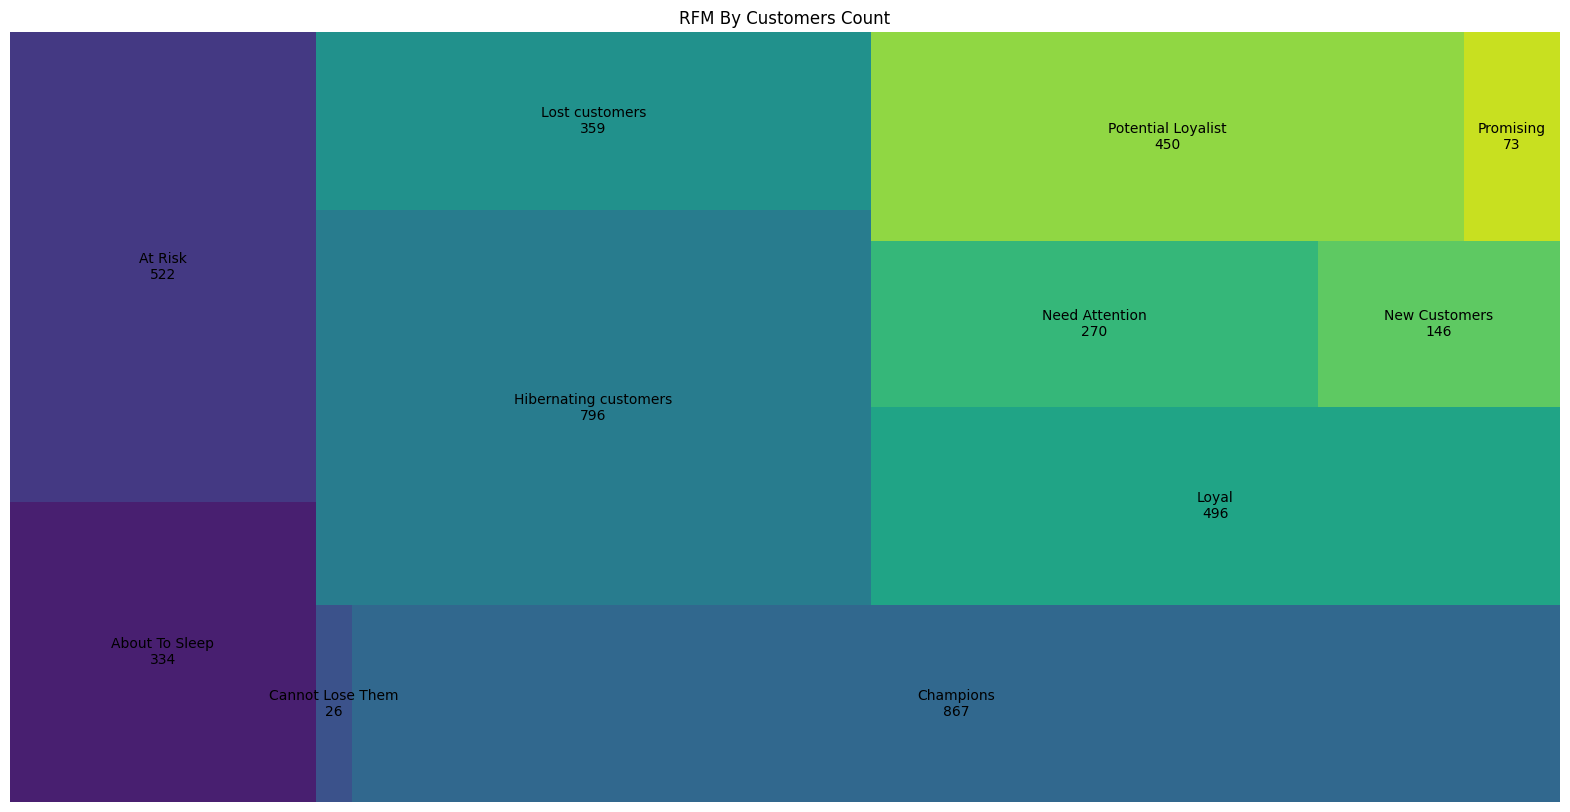

In [31]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
squarify.plot(
    RFM_summarize['Customer_Counts'].to_list(),
    label = RFM_summarize['Segment'] + '\n' + RFM_summarize['Customer_Counts'].astype(str),
    color = sns.color_palette ('viridis', len( RFM_summarize['Segment'].to_list()))
)
plt.title ('RFM By Customers Count')
plt.axis("off")

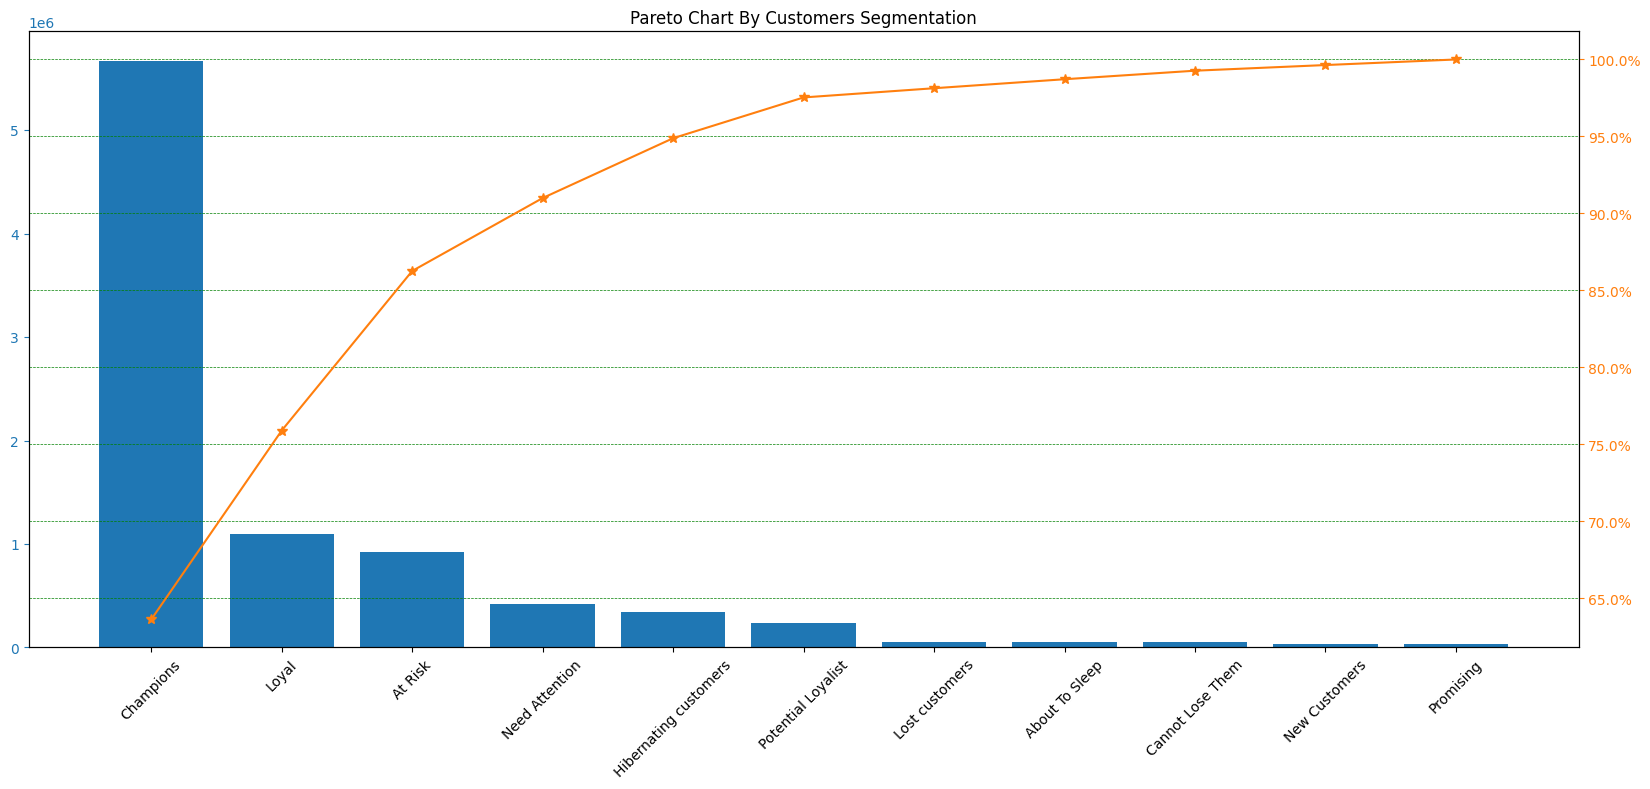

In [34]:
from matplotlib.ticker import PercentFormatter
RFM_summarize = RFM_summarize.sort_values(by='Total_M',ascending=False)
RFM_summarize["cumpercentage"] = RFM_summarize["Total_M"].cumsum()/RFM_summarize["Total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(RFM_summarize['Segment'], RFM_summarize["Total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(RFM_summarize['Segment'], RFM_summarize["cumpercentage"], color="C1", marker="*", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title ('Pareto Chart By Customers Segmentation')
plt.show()